In [1]:
import pandas as pd
import cv2
from tqdm import tqdm
import os
import numpy as np
import tensorflow as tf

In [2]:
import os
loc1 = 'lung_colon_image_set/lung_image_sets'
loc2 = 'lung_colon_image_set/colon_image_sets'

In [3]:
import cv2
from tqdm import tqdm
features = []

for dir in os.listdir(loc1):
    sub_dir = os.path.join(loc1,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        f = cv2.resize(f , (100,100))
        features.append(f)
        
for dir in os.listdir(loc2):
    sub_dir = os.path.join(loc2,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        f = cv2.resize(f , (100,100))
        features.append(f)

lung_colon_image_set/lung_image_sets/lung_aca
*************


100%|██████████████████████████████████████| 5000/5000 [00:15<00:00, 326.88it/s]


lung_colon_image_set/lung_image_sets/lung_n
*************


100%|██████████████████████████████████████| 5000/5000 [00:12<00:00, 390.76it/s]


lung_colon_image_set/lung_image_sets/lung_scc
*************


100%|██████████████████████████████████████| 5000/5000 [00:13<00:00, 372.55it/s]


lung_colon_image_set/colon_image_sets/colon_n
*************


100%|██████████████████████████████████████| 5000/5000 [00:15<00:00, 319.28it/s]


lung_colon_image_set/colon_image_sets/colon_aca
*************


100%|██████████████████████████████████████| 5000/5000 [00:16<00:00, 312.26it/s]


In [4]:
X = np.array(features)
del features
print(X.shape)

(25000, 100, 100, 3)


In [5]:
labels = []
i = 0
for dir in os.listdir(loc1):
    sub_dir = os.path.join(loc1,dir)
    print(sub_dir)
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1
    
for dir in os.listdir(loc2):
    sub_dir = os.path.join(loc2,dir)
    print(sub_dir)
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1


lung_colon_image_set/lung_image_sets/lung_aca


100%|██████████████████████████████████| 5000/5000 [00:00<00:00, 3977905.92it/s]


lung_colon_image_set/lung_image_sets/lung_n


100%|██████████████████████████████████| 5000/5000 [00:00<00:00, 3623901.85it/s]


lung_colon_image_set/lung_image_sets/lung_scc


100%|██████████████████████████████████| 5000/5000 [00:00<00:00, 3712430.52it/s]


lung_colon_image_set/colon_image_sets/colon_n


100%|██████████████████████████████████| 5000/5000 [00:00<00:00, 3654848.38it/s]


lung_colon_image_set/colon_image_sets/colon_aca


100%|██████████████████████████████████| 5000/5000 [00:00<00:00, 3538302.68it/s]


In [6]:
y = np.array(labels)
print(y.shape)

(25000,)


In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y)
del X,y

In [8]:
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()

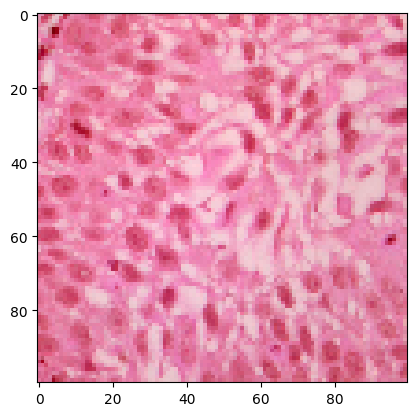

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[15600])
plt.show()

In [10]:
import tensorflow as tf
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [11]:
from keras import layers, models, regularizers

In [12]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

model = models.Sequential()

model.add(RandomFlip("horizontal", input_shape=(100,100,3)))

model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(1024, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512 , activation='relu' ))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)        

In [13]:
from keras import optimizers
adam = optimizers.Adam(0.0001)

model.compile(loss='categorical_crossentropy' , optimizer=adam , metrics=['accuracy'])

In [14]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-7)

history = model.fit(xtrain, ytrain,
                   epochs=15, validation_data=(xtest, ytest),
                   callbacks=[learning_rate_annealer])

Epoch 1/15


2023-04-25 11:17:52.527435: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


586/586 [==============================] - 86s 140ms/step - loss: 0.6326 - accuracy: 0.7150 - val_loss: 0.3815 - val_accuracy: 0.8464 - lr: 1.0000e-04
Epoch 2/15
586/586 [==============================] - 77s 131ms/step - loss: 0.3621 - accuracy: 0.8495 - val_loss: 0.5496 - val_accuracy: 0.7733 - lr: 1.0000e-04
Epoch 3/15
586/586 [==============================] - 77s 132ms/step - loss: 0.2922 - accuracy: 0.8789 - val_loss: 0.2940 - val_accuracy: 0.8774 - lr: 1.0000e-04
Epoch 4/15
586/586 [==============================] - 74s 127ms/step - loss: 0.2104 - accuracy: 0.9177 - val_loss: 0.2095 - val_accuracy: 0.9142 - lr: 1.0000e-04
Epoch 5/15
586/586 [==============================] - 75s 128ms/step - loss: 0.1592 - accuracy: 0.9369 - val_loss: 0.1443 - val_accuracy: 0.9456 - lr: 1.0000e-04
Epoch 6/15
586/586 [==============================] - 77s 132ms/step - loss: 0.1305 - accuracy: 0.9500 - val_loss: 0.1230 - val_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 7/15
586/586 [===================

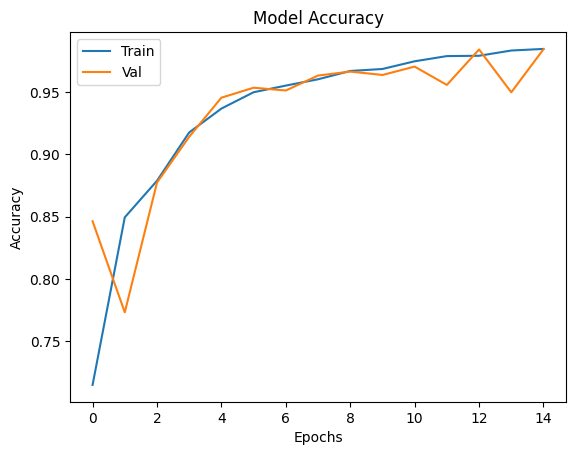

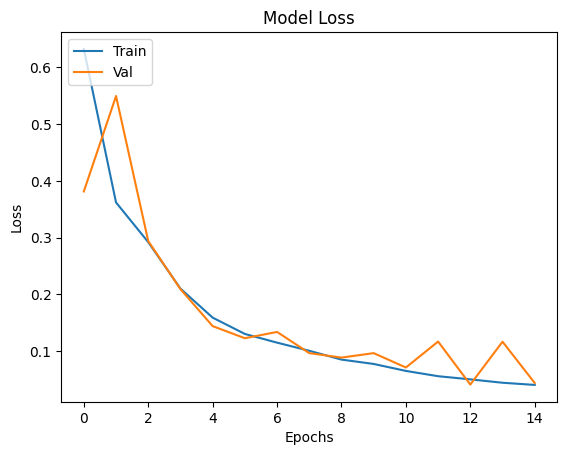

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [16]:
model.evaluate(xtrain,ytrain)

586/586 [==============================] - 25s 40ms/step - loss: 0.0246 - accuracy: 0.9920


[0.024620236828923225, 0.9919999837875366]

In [17]:
model.evaluate(xtest,ytest)

196/196 [==============================] - 8s 40ms/step - loss: 0.0441 - accuracy: 0.9845


[0.04407728835940361, 0.9844800233840942]

In [18]:
ytrainR = [np.argmax(val) for val in ytrain]
ytrainP = [np.argmax(val) for val in model.predict(xtrain)]

586/586 [==============================] - 23s 35ms/step


In [19]:
ytestR = [np.argmax(val) for val in ytest]
ytestP = [np.argmax(val) for val in model.predict(xtest)]

196/196 [==============================] - 7s 33ms/step


In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

<Figure size 500x100 with 0 Axes>

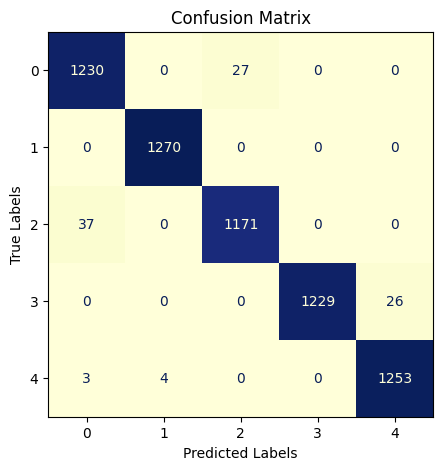

In [22]:
plt.figure(figsize= (5,1))
cm = confusion_matrix(ytestR, ytestP)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
cancer_cells = ['lung_aca' , 'lung_scc' , 'lung_n' , 'colon_aca' , 'colon_n']

1/1 [==============================] - 1s 1s/step
Predicted Value- colon_aca
Real Value- colon_aca


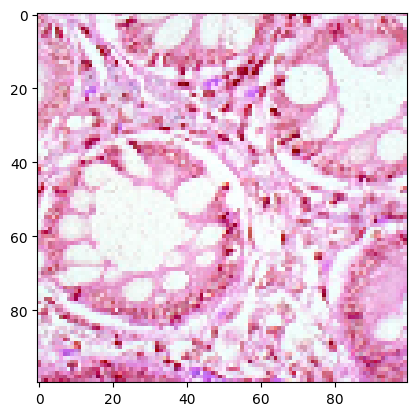

In [26]:
print('Predicted Value-' , cancer_cells[np.argmax(model.predict(xtest[16].reshape(1,100,100,3)))])
print('Real Value-' , cancer_cells[np.argmax(ytest[16])])

plt.imshow(xtest[16])
plt.show()